# Lecture Seven: Beta-Binomial Inference

## Beta Densities

Let us start today by noting some general properties of Beta densities. For two positive real numbers $a$ and $b$, the $\text{Beta}(a, b)$ density is given by: 
\begin{align*}
   f_{\text{Beta}(a, b)}(u) = \frac{u^{a-1} (1-u)^{b-1} I\{0 \leq u \leq 1\}}{\int_0^1 u^{a-1} (1-u)^{b-1} du}
\end{align*}
The numbers $a$ and $b$ control the shape of the Beta density. The following facts on the $\text{Beta}(a, b)$ distribution will be quite useful for rest of today's lecture: 

1. The simplest Beta density is the uniform density corresponding to $a = 1$ and $b = 1$ which is flat on $[0, 1]$. 
2. The mean of the Beta distribution is $\frac{a}{a+b}$. For example, when $a = 10$ and $b = 30$, the mean equals $0.25$. On the other hand, when $a = 30$ and $b = 10$, the mean equals $0.75$.
3. The variance of the Beta distribution is $\frac{ab}{(a+b)^2(a+b+1)} = \frac{a}{a+b} \frac{b}{a+b} \frac{1}{a+b+1}$. Thus when $a+b$ is large, the variance will be small and the Beta density will look quite skinny around its mean. 

You can learn a lot more about Beta Densities from its wikipedia page. 

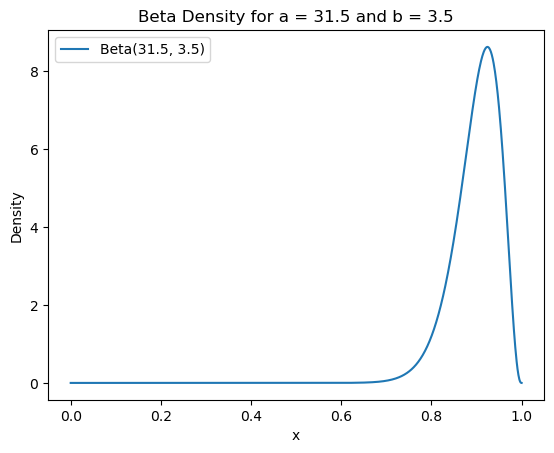

In [1]:
#Plotting Beta densities:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

a = 31.5
b = 3.5
x = np.linspace(0, 1, 1000)
y = beta.pdf(x, a, b)
plt.plot(x, y, label = f"Beta({a}, {b})")
plt.title(f'Beta Density for a = {a} and b = {b}')
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

## Recap of Last Lecture

In the last lecture, we focused on the following problem. Estimate the quality of a product from reviews. We used $\theta$ to denote the quality of the product. The reviews are summarized by the number of positive reviews ($Pos$) and the number of negative reviews ($Neg$); the total number of reviews is $Tot = Pos + Neg$. The likelihood that we worked with was the Bernoulli likelihood given by: 
\begin{align*}
  \mathbb{P} \{\text{reviews} \mid \theta = u \} = u^{Pos} (1-u)^{Neg}.
\end{align*}
The naive estimate for $\theta$ is the proportion $\frac{Pos}{Tot} = \frac{Pos}{Pos + Neg}$. This may be reasonable when the number of reviews is large but quite unreasonable when the number of reviews is small. For example, when $Pos = 3$, $Neg = 0$ (so that $Tot = 3$), the proportion is 1 which is clearly not a good estimate of $\theta$ (we do not want to infer that the microwave is perfect based on only three reviews). In the sequel, the names "naive estimate", "proportion", "naive proportion", "MLE" all refer to the same thing. 

The Bayesian approach uses probability and supplements the likelihood with a prior on $\theta$. The prior reflects the uncertainty in $\theta$ before observing review data. In the last class, we worked with the uniform prior: $\theta \in \text{uniform}[0, 1]$. We saw that the posterior is given by $\text{Beta}(1 + Pos, 1 + Neg)$. In other words, 
\begin{align*}
   \text{uniform prior} ~~ + ~~ \text{Bernoulli likelihood} ~~ \implies ~~ \text{Beta}(1 + Pos, 1 + Neg) \text{ posterior}
\end{align*}

### More General Priors 

Because the uniform prior is also $\text{Beta}(1, 1)$, we can rewrite the above as:
\begin{align*}
   \text{Beta}(1, 1) \text{ prior} ~~ + ~~ \text{Bernoulli likelihood} ~~ \implies ~~ \text{Beta}(1 + Pos, 1 + Neg) \text{ posterior}
\end{align*}
The above fact actually works if we replace 1 and 1 by any positive $a$ and $b$. In other words, 
\begin{align*}
   \text{Beta}(a, b) \text{ prior} ~~ + ~~ \text{Bernoulli likelihood} ~~ \implies ~~ \text{Beta}(a + Pos, b + Neg) \text{ posterior}
\end{align*}
We can take advantage of this and work with non-uniform priors. For example, suppose we believe that products in this specific marketplace are never of quality below 0.8 and typically of quality 0.9, we can incorporate this as a $\text{Beta}(a, b)$ prior as follows. We set the mean $\frac{a}{a+b}$ to be equal to 0.9 and the standard deviation to be equal to $0.05$ (so that two standard deviations cover the gap between the typical value 0.9 and the realistic lowest value $0.8$). This can be solved to get $a = 31.5$ and $b = 3.5$. This prior and the corresponding posterior for $Pos = 3$ and $Neg = 0$ can be plotted as follows. 


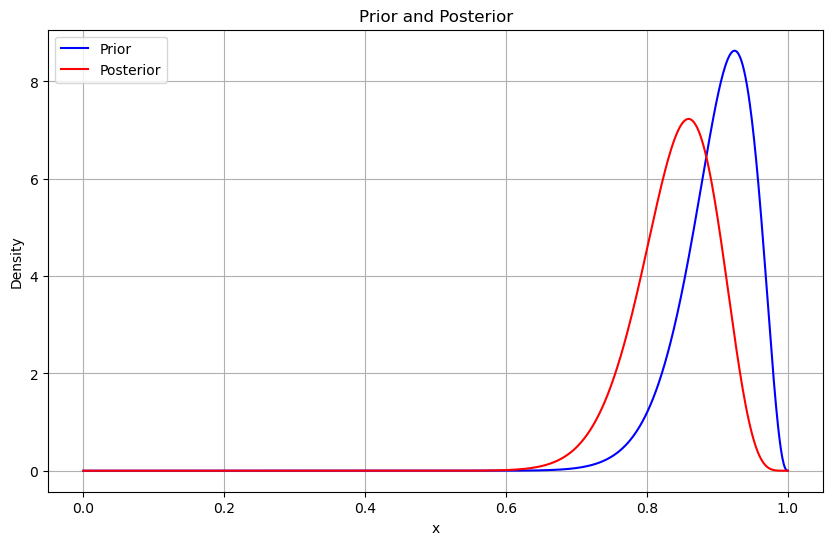

In [59]:
# Define the range of values
x = np.linspace(0, 1, 1000)
a = 31.5
b = 3.5
pos = 3
neg = 3
pdf1 = beta.pdf(x, a, b) #prior density
pdf2 = beta.pdf(x, a + pos, b + neg) #posterior density

# Plot the densities
plt.figure(figsize=(10, 6))
plt.plot(x, pdf1, label='Prior', color='blue')
plt.plot(x, pdf2, label='Posterior', color='red')
plt.title('Prior and Posterior')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

### Comparison between Naive Estimates (proportions) and Bayesian Estimates

Recall again that 
\begin{align*}
  \text{naive estimate} = \text{proportion} = \frac{Pos}{Tot} = \frac{Pos}{Pos+Neg}
\end{align*}
The Bayesian does not use the naive estimate but instead summarizes the posterior uncertainty in the form of the $\text{Beta}(a + Pos, b + Neg)$ density. One commonly used Bayesian Estimate is the posterior mean which is
\begin{align*}
   \text{Bayesian estimate} = \frac{a + Pos}{a + b + Tot} = \frac{a + Pos}{a + b + Pos + Neg}
\end{align*}

These posterior means are better summaries for the quality of each microwave compared to the naive proportion. In our case, when $+_A = 3, -_A = 0$ and $+_B = 19, -_B = 1$, these posterior means become $\frac{a+3}{a+b+3}$ and $\frac{a+19}{a+b+20}$ respectively. In the case of the uniform prior ($a = b = 1$), these become $\frac{4}{5} = 0.8$ and $\frac{20}{22} = 0.91$ respectively. Also note that if the total number of reviews is large compared to $a+b$ and if the number of positive reviews is large compared to $a$, then the posterior means revert to the naive proportions. 

## Kidney Cancer Dataset

Now we shall study a real dataset where naive proportions can be uninformative or even misleading. This is an example on "Bayesian Disease Mapping", and is taken from Section 2.7 on estimation of kidney cancer rates of the book "Bayesian Data Analysis Edition 3" by Gelman et al. Some of the code is taken from a blog post by Robin Ryder (google this).   

In [23]:
#Read the kidney cancer dataset
import pandas as pd

d_full = pd.read_csv("KidneyCancerClean.csv", skiprows=4)
display(d_full.head(15))
summary = d_full.describe(include = 'all')
display(summary)

Unnamed: 0    state                  Location  fips  dc    dcV     pop  \
0          108  ALABAMA   Autauga County, Alabama  1001   2  VALID   61921   
1          117  ALABAMA   Baldwin County, Alabama  1003   7  VALID  170945   
2          129  ALABAMA   Barbour County, Alabama  1005   0  VALID   33316   
3          199  ALABAMA      Bibb County, Alabama  1007   0  VALID   30152   
4          219  ALABAMA    Blount County, Alabama  1009   3  VALID   88342   
5          306  ALABAMA   Bullock County, Alabama  1011   0  VALID    8313   
6          318  ALABAMA    Butler County, Alabama  1013   0  VALID   31963   
7          343  ALABAMA   Calhoun County, Alabama  1015   9  VALID  243105   
8          439  ALABAMA  Chambers County, Alabama  1017   7  VALID   59985   
9          467  ALABAMA  Cherokee County, Alabama  1019   0  VALID   43401   
10         490  ALABAMA   Chilton County, Alabama  1021   2  VALID   65792   
11         496  ALABAMA   Choctaw County, Alabama  1023   1  VALID   22741   
12         527  ALABAMA    Clarke County, Alabama  1025   1  VALID   38611   
13         533  ALABAMA      Clay County, Alabama  1027   3  VALID   27846   
14         557  ALABAMA  Cleburne County, Alabama  1029   2  VALID   29718   

     popV  aadc       aadcV  ...  good dc.2  dcV.2   pop.2 popV.2  aadc.2  \
0   VALID   3.3  UNRELIABLE  ...     1    1  VALID   64915  VALID     1.7   
1   VALID   3.5  UNRELIABLE  ...     1   15  VALID  195253  VALID     6.3   
2   VALID   0.0  UNRELIABLE  ...     1    1  VALID   33987  VALID     2.6   
3   VALID   0.0  UNRELIABLE  ...     1    1  VALID   31175  VALID     2.9   
4   VALID   3.2  UNRELIABLE  ...     1    5  VALID   91547  VALID     4.8   
5   VALID   0.0  UNRELIABLE  ...     1    0  VALID    8197  VALID     0.0   
6   VALID   0.0  UNRELIABLE  ...     1    1  VALID   31722  VALID     2.8   
7   VALID   4.0  UNRELIABLE  ...     1   12  VALID  233021  VALID     5.4   
8   VALID   8.3  UNRELIABLE  ...     1    0  VALID   57813  VALID     0.0   
9   VALID   0.0  UNRELIABLE  ...     1    0  VALID   43828  VALID     0.0   
10  VALID   3.1  UNRELIABLE  ...     1    3  VALID   68837  VALID     3.8   
11  VALID   3.7  UNRELIABLE  ...     1    3  VALID   22441  VALID    11.4   
12  VALID   2.5  UNRELIABLE  ...     1    3  VALID   37772  VALID     6.7   
13  VALID   8.1  UNRELIABLE  ...     1    3  VALID   26954  VALID     8.9   
14  VALID   5.9  UNRELIABLE  ...     1    1  VALID   29735  VALID     3.1   

       aadcV.2  dcC.2      dcCV.2  good.2  
0   UNRELIABLE    1.5  UNRELIABLE       1  
1   UNRELIABLE    7.7  UNRELIABLE       1  
2   UNRELIABLE    2.9  UNRELIABLE       1  
3   UNRELIABLE    3.2  UNRELIABLE       1  
4   UNRELIABLE    5.5  UNRELIABLE       1  
5   UNRELIABLE    0.0  UNRELIABLE       1  
6   UNRELIABLE    3.2  UNRELIABLE       1  
7   UNRELIABLE    5.1  UNRELIABLE       1  
8   UNRELIABLE    0.0  UNRELIABLE       1  
9   UNRELIABLE    0.0  UNRELIABLE       1  
10  UNRELIABLE    4.4  UNRELIABLE       1  
11  UNRELIABLE   13.4  UNRELIABLE       1  
12  UNRELIABLE    7.9  UNRELIABLE       1  
13  UNRELIABLE   11.1  UNRELIABLE       1  
14  UNRELIABLE    3.4  UNRELIABLE       1  

[15 rows x 22 columns]

Unnamed: 0  state                  Location          fips  \
count   3110.000000   3110                      3110   3110.000000   
unique          NaN     50                      3109           NaN   
top             NaN  TEXAS  Bedford County, Virginia           NaN   
freq            NaN    254                         2           NaN   
mean    1555.500000    NaN                       NaN  30672.690675   
std      897.923995    NaN                       NaN  14980.587745   
min        1.000000    NaN                       NaN   1001.000000   
25%      778.250000    NaN                       NaN  19041.500000   
50%     1555.500000    NaN                       NaN  29210.000000   
75%     2332.750000    NaN                       NaN  46008.500000   
max     3110.000000    NaN                       NaN  56045.000000   

                 dc    dcV           pop   popV         aadc       aadcV  ...  \
count   3110.000000   3110  3.110000e+03   3110  3110.000000        3110  ...   
unique          NaN      1           NaN      1          NaN           2  ...   
top             NaN  VALID           NaN  VALID          NaN  UNRELIABLE  ...   
freq            NaN   3110           NaN   3110          NaN        2882  ...   
mean       7.527974    NaN  1.550087e+05    NaN     4.438392         NaN  ...   
std       23.095402    NaN  4.722345e+05    NaN     3.501390         NaN  ...   
min        0.000000    NaN  2.580000e+02    NaN     0.000000         NaN  ...   
25%        1.000000    NaN  2.238250e+04    NaN     2.100000         NaN  ...   
50%        2.000000    NaN  4.762800e+04    NaN     4.300000         NaN  ...   
75%        6.000000    NaN  1.146262e+05    NaN     6.100000         NaN  ...   
max      647.000000    NaN  1.526640e+07    NaN    49.800000         NaN  ...   

               good         dc.2  dcV.2         pop.2 popV.2       aadc.2  \
count   3110.000000  3110.000000   3110  3.110000e+03   3110  3110.000000   
unique          NaN          NaN      1           NaN      1          NaN   
top             NaN          NaN  VALID           NaN  VALID          NaN   
freq            NaN          NaN   3110           NaN   3110          NaN   
mean       0.985852     8.359164    NaN  1.606611e+05    NaN     4.834244   
std        0.118120    23.765728    NaN  4.972750e+05    NaN     3.709540   
min        0.000000     0.000000    NaN  2.670000e+02    NaN     0.000000   
25%        1.000000     1.000000    NaN  2.213000e+04    NaN     2.525000   
50%        1.000000     3.000000    NaN  4.806950e+04    NaN     4.600000   
75%        1.000000     7.000000    NaN  1.179355e+05    NaN     6.600000   
max        1.000000   598.000000    NaN  1.660789e+07    NaN    44.600000   

           aadcV.2        dcC.2      dcCV.2       good.2  
count         3110  3109.000000        3109  3110.000000  
unique           3          NaN           2          NaN  
top     UNRELIABLE          NaN  UNRELIABLE          NaN  
freq          2848          NaN        2848          NaN  
mean           NaN     5.787359         NaN     0.985852  
std            NaN     5.030156         NaN     0.118120  
min            NaN     0.000000         NaN     0.000000  
25%            NaN     2.800000         NaN     1.000000  
50%            NaN     5.200000         NaN     1.000000  
75%            NaN     7.700000         NaN     1.000000  
max            NaN    71.800000         NaN     1.000000  

[11 rows x 22 columns]

This is county-level data on population and deaths due to kidney cancer. There are quite a few columns in the dataset but we shall only work with the four columns: dc, dc.2, pop and pop.2:

1. The columns dc and dc.2 represent death counts due to kidney cancer in 1980-84 and 1985-89 respectively. 
2. The columns pop and pop.2 represent some measure of the average population in 1980-84 and 1985-89 respectively. 

Let us create a smaller dataframe with only these columns. 

In [24]:
d = d_full[['state', 'Location', 'fips', 'dc', 'pop', 'dc.2', 'pop.2']].copy()
display(d.head(20))

state                   Location  fips  dc     pop  dc.2   pop.2
0   ALABAMA    Autauga County, Alabama  1001   2   61921     1   64915
1   ALABAMA    Baldwin County, Alabama  1003   7  170945    15  195253
2   ALABAMA    Barbour County, Alabama  1005   0   33316     1   33987
3   ALABAMA       Bibb County, Alabama  1007   0   30152     1   31175
4   ALABAMA     Blount County, Alabama  1009   3   88342     5   91547
5   ALABAMA    Bullock County, Alabama  1011   0    8313     0    8197
6   ALABAMA     Butler County, Alabama  1013   0   31963     1   31722
7   ALABAMA    Calhoun County, Alabama  1015   9  243105    12  233021
8   ALABAMA   Chambers County, Alabama  1017   7   59985     0   57813
9   ALABAMA   Cherokee County, Alabama  1019   0   43401     0   43828
10  ALABAMA    Chilton County, Alabama  1021   2   65792     3   68837
11  ALABAMA    Choctaw County, Alabama  1023   1   22741     3   22441
12  ALABAMA     Clarke County, Alabama  1025   1   38611     3   37772
13  ALABAMA       Clay County, Alabama  1027   3   27846     3   26954
14  ALABAMA   Cleburne County, Alabama  1029   2   29718     1   29735
15  ALABAMA     Coffee County, Alabama  1031   3   80334     4   81882
16  ALABAMA    Colbert County, Alabama  1033   3  108797     6  104971
17  ALABAMA    Conecuh County, Alabama  1035   2   22009     2   20687
18  ALABAMA      Coosa County, Alabama  1037   2   18003     1   17828
19  ALABAMA  Covington County, Alabama  1039   4   76229     3   75990

The purpose of this data analysis is to estimate the kidney cancer death rates for each county and, more importantly, **to flag the counties with high kidney cancer death rates**. Before proceeding to the analysis, let us first combine the death counts for the two periods 80-84 and 85-89 to get one overall death count for each county. Further, let us take the average of pop and pop.2 to get a measure of the average population of each county in the period 80-89. 

In [25]:
# Combine the death and population counts for the two periods 80-84 and 85-89
d['dct'] = d['dc'] + d['dc.2'] #dct stands for death count total
d['popm'] = (d['pop'] + d['pop.2']) / 2
display(d.head(15))

state                  Location  fips  dc     pop  dc.2   pop.2  dct  \
0   ALABAMA   Autauga County, Alabama  1001   2   61921     1   64915    3   
1   ALABAMA   Baldwin County, Alabama  1003   7  170945    15  195253   22   
2   ALABAMA   Barbour County, Alabama  1005   0   33316     1   33987    1   
3   ALABAMA      Bibb County, Alabama  1007   0   30152     1   31175    1   
4   ALABAMA    Blount County, Alabama  1009   3   88342     5   91547    8   
5   ALABAMA   Bullock County, Alabama  1011   0    8313     0    8197    0   
6   ALABAMA    Butler County, Alabama  1013   0   31963     1   31722    1   
7   ALABAMA   Calhoun County, Alabama  1015   9  243105    12  233021   21   
8   ALABAMA  Chambers County, Alabama  1017   7   59985     0   57813    7   
9   ALABAMA  Cherokee County, Alabama  1019   0   43401     0   43828    0   
10  ALABAMA   Chilton County, Alabama  1021   2   65792     3   68837    5   
11  ALABAMA   Choctaw County, Alabama  1023   1   22741     3   22441    4   
12  ALABAMA    Clarke County, Alabama  1025   1   38611     3   37772    4   
13  ALABAMA      Clay County, Alabama  1027   3   27846     3   26954    6   
14  ALABAMA  Cleburne County, Alabama  1029   2   29718     1   29735    3   

        popm  
0    63418.0  
1   183099.0  
2    33651.5  
3    30663.5  
4    89944.5  
5     8255.0  
6    31842.5  
7   238063.0  
8    58899.0  
9    43614.5  
10   67314.5  
11   22591.0  
12   38191.5  
13   27400.0  
14   29726.5

A simple way to estimate the kidney cancer rate of each county is to use the proportion: 
\begin{align*}
\text{Naive Estimate of Kidney Cancer Death Rate} =  \frac{\text{Number of Kidney Cancer Deaths}}{\text{Population}}
\end{align*}
We can then rank all the counties according to their naive proportions and flag the counties for whom the naive proportion is high. 

count    3110.000000
mean        0.000108
std         0.000068
min         0.000000
25%         0.000067
50%         0.000100
75%         0.000139
max         0.000691
Name: naiveproportion, dtype: float64


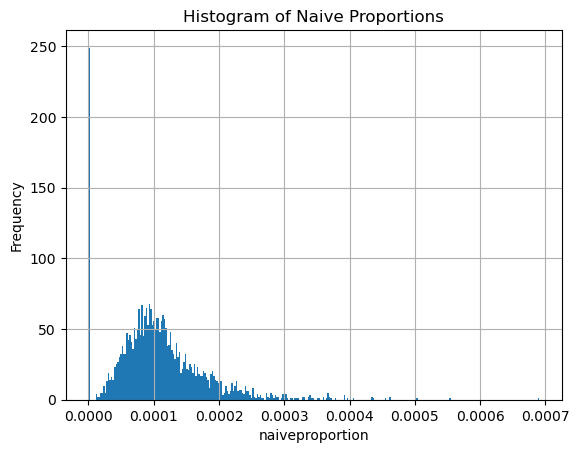

In [26]:
d['naiveproportion'] = d['dct'] / d['popm']
summary = d['naiveproportion'].describe()
print(summary)
#Histogram of naive proportion estimates:
import matplotlib.pyplot as plt
plt.hist(d['naiveproportion'], bins=300)
plt.xlabel('naiveproportion')
plt.ylabel('Frequency')
plt.title('Histogram of Naive Proportions')
plt.grid(True)
plt.show()
#Some observations on the histogram: 
#There is a spike at zero (corresponding to counties with no kidney cancer deaths)
#Most proportions are around 0.0001 but there are a few counties which have large proportions (more than 0.0004)

In [27]:
#Flagging Counties with High Kidney Cancer Death Proportions. 
#One way to do this is to get the counties with the 100 highest naive proportion:
threshold = d['naiveproportion'].nlargest(100).iloc[-1]
print(threshold)

d['cancerhigh'] = d['naiveproportion'] >= threshold
with pd.option_context('display.max_rows', None):
    display(d[d['cancerhigh'] >= True])

0.00025143527636927463


state                          Location   fips  dc    pop  \
65           ALABAMA            Wilcox County, Alabama   1131   2  11144   
148         ARKANSAS            Sharp County, Arkansas   5135   4  34922   
149         ARKANSAS            Stone County, Arkansas   5137   1  22387   
230         COLORADO          Dolores County, Colorado   8033   1   4151   
473          GEORGIA           Quitman County, Georgia  13239   0   2524   
485          GEORGIA            Talbot County, Georgia  13263   1   5855   
495          GEORGIA          Treutlen County, Georgia  13283   1   9944   
512          GEORGIA            Wilkes County, Georgia  13317   3  14334   
535            IDAHO               Clark County, Idaho  16033   1   2212   
549            IDAHO               Lewis County, Idaho  16061   2   9705   
570         ILLINOIS          Carroll County, Illinois  17015   5  44858   
575         ILLINOIS             Clay County, Illinois  17025   8  37117   
595         ILLINOIS         Hamilton County, Illinois  17065   2  21935   
793             IOWA               Greene County, Iowa  19073   4  28283   
836             IOWA             Ringgold County, Iowa  19159   2  14228   
839             IOWA               Shelby County, Iowa  19165   4  36486   
844             IOWA                Union County, Iowa  19175   7  32300   
854             IOWA                Worth County, Iowa  19195   1  21765   
868           KANSAS              Clark County, Kansas  20025   2   6192   
882           KANSAS          Ellsworth County, Kansas  20053   2  15935   
892           KANSAS          Greenwood County, Kansas  20073   3  20883   
935           KANSAS               Rice County, Kansas  20159   5  27283   
951           KANSAS             Sumner County, Kansas  20191   5  60141   
959           KANSAS            Woodson County, Kansas  20207   0  11148   
1025        KENTUCKY              Lee County, Kentucky  21129   2  18961   
1071        KENTUCKY            Trigg County, Kentucky  21221   1  20577   
1199        MICHIGAN           Alcona County, Michigan  26001   2  23953   
1246        MICHIGAN             Luce County, Michigan  26095   2  14850   
1258        MICHIGAN      Montmorency County, Michigan  26119   2  18711   
1270        MICHIGAN        Roscommon County, Michigan  26143   5  41957   
1316       MINNESOTA         Kittson County, Minnesota  27069   1  16438   
1372     MISSISSIPPI        Attala County, Mississippi  28007   5  27969   
1376     MISSISSIPPI       Carroll County, Mississippi  28015   1  12952   
1379     MISSISSIPPI     Claiborne County, Mississippi  28021   0   7405   
1400     MISSISSIPPI     Jefferson County, Mississippi  28063   0   3927   
1403     MISSISSIPPI        Kemper County, Mississippi  28069   2  11047   
1417     MISSISSIPPI    Montgomery County, Mississippi  28097   0  18294   
1428     MISSISSIPPI       Quitman County, Mississippi  28119   1  12630   
1440     MISSISSIPPI        Tunica County, Mississippi  28143   0   5776   
1457        MISSOURI            Bates County, Missouri  29013   9  37094   
1487        MISSOURI        Gasconade County, Missouri  29073   6  32412   
1512        MISSOURI           Maries County, Missouri  29125   4  19261   
1519        MISSOURI           Monroe County, Missouri  29137   2  22560   
1527        MISSOURI            Ozark County, Missouri  29153   1  20050   
1553        MISSOURI           Shelby County, Missouri  29205   1  18180   
1564        MISSOURI            Worth County, Missouri  29227   1   7016   
1575         MONTANA           Daniels County, Montana  30019   1   6864   
1583         MONTANA           Glacier County, Montana  30035   2  14163   
1585         MONTANA           Granite County, Montana  30039   0   6891   
1594         MONTANA            McCone County, Montana  30055   1   7136   
1608         MONTANA         Roosevelt County, Montana  30085   2  16259   
1620         MONTANA            Wibaux County, Montana  30109  

In [28]:
#It will be cool to plot the high cancer counties (in terms of the naive proportions) on the US map
#This can be done in the following way.
import plotly.express as px
#First convert fips to standard form:
d['modfips'] = d['fips'].apply(lambda x: str(x).zfill(5))
#Plotting the counties with high cancer proportion:
fig = px.choropleth(
    d, 
    geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json", # This is a dataset containing county geometries
    locations='modfips', # Use the 'fips' column for county identification
    color='cancerhigh',
    hover_name='Location',  # Display the 'Location' column on hover
    scope="usa",
    title="Top 100 kidney cancer death rate counties (in terms of naive proportions)",
    color_continuous_scale="YlOrRd"
)
fig.update_geos(fitbounds="locations")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

Question: Is this a good way of flagging the high kidney cancer rate counties? Should we now look into specific reasons (such as dietary patterns, pollution etc, lack of access to quality medical care etc.) why these  counties have high rates? 

It turns out that this analysis is misleading because of the use of naive proportions as estimates of kidney cancer death rates. In particular, the counties that we flagged are mostly counties with low populations. This can be understood as follows. The typical rate of kidney cancer is about 0.0001. This can be seen, for example, from the naive proportion estimates of counties with large populations. 

In [29]:
sorted_populations = d['popm'].sort_values()
print(list(sorted_populations))
#Select counties with large populations
#By large population, let us take populations more than 300000
largecounties = d[d['popm'] >= 300000]
largecounties.shape[0]
#So there are 323 counties with population more than 300000
#Let us evaluate the naive proportions for these counties. 
summary = d[d['popm'] >= 300000]['naiveproportion'].describe()
display(summary)
#the mean and median are about 0.0001. This can therefore be viewed as a typical value of the kidney cancer rate

[262.5, 978.0, 1017.0, 1139.0, 1233.5, 1268.0, 1297.0, 1448.0, 1570.5, 1594.0, 1640.5, 1862.5, 1879.0, 1942.0, 1946.5, 2058.5, 2108.0, 2160.5, 2171.0, 2175.5, 2194.0, 2250.0, 2296.0, 2337.0, 2342.5, 2353.0, 2358.5, 2473.5, 2522.5, 2540.5, 2542.5, 2547.5, 2570.5, 2731.0, 2731.5, 2817.5, 2866.5, 3005.5, 3027.0, 3095.0, 3102.5, 3268.5, 3294.5, 3305.0, 3433.0, 3434.0, 3532.5, 3556.5, 3583.0, 3596.5, 3616.0, 3629.0, 3819.0, 3974.0, 4044.5, 4076.0, 4129.0, 4182.0, 4188.5, 4224.0, 4341.5, 4342.5, 4349.0, 4351.0, 4448.5, 4449.5, 4450.0, 4465.0, 4487.0, 4493.5, 4518.5, 4527.5, 4571.5, 4600.5, 4632.5, 4695.5, 4715.5, 4784.5, 4832.0, 4836.5, 4952.0, 4956.5, 5169.0, 5177.5, 5236.0, 5256.5, 5268.0, 5282.0, 5284.5, 5309.5, 5311.5, 5343.5, 5359.0, 5391.0, 5404.5, 5407.5, 5424.5, 5435.5, 5478.0, 5529.5, 5594.0, 5596.5, 5602.5, 5619.0, 5712.0, 5730.0, 5743.0, 5786.0, 5789.5, 5808.0, 5849.0, 5853.5, 5899.0, 5902.0, 5905.0, 5916.0, 5925.5, 5931.5, 6012.5, 6034.5, 6097.0, 6111.0, 6115.0, 6236.0, 6315.0, 6

count    323.000000
mean       0.000098
std        0.000029
min        0.000034
25%        0.000081
50%        0.000095
75%        0.000115
max        0.000227
Name: naiveproportion, dtype: float64

Now we can explain why our initial flagged set of high cancer rate counties is dominated by counties with low populations. Consider a county with a small population of 1000. In the given ten-year period, suppose this county has 1 kidney cancer death. The naive proportion would then be 1/1000 = 0.001 which is already 10 times the typical rate of 0.0001. So this county would immediately be flagged as a high cancer rate county just because of the single death. Go back to our flagged list of high population counties and check the population sizes. 

In [32]:
d[d['naiveproportion'] >= threshold]['popm'].describe()
#The county with the largest population in this list is 60000 but there are counties with population as small as 1448.

count      100.000000
mean     16940.950000
std      11922.792393
min       1448.000000
25%       8442.625000
50%      14204.250000
75%      21550.375000
max      60380.500000
Name: popm, dtype: float64

### Bayesian estimates of the kidney cancer death rates

For Bayesian estimates, we need an appropriate prior. One way of obtaining such a prior is to consider the naive proportions of the large population counties (say, with population at least 300000) and to fit a Beta density to the naive proportions. This can be done via mean and variance as follows.

In [33]:
proportions_largecounties = d['naiveproportion'][d['popm'] >= 300000] #filter out the high population counties
mean_largecounties = np.mean(proportions_largecounties)
var_largecounties = np.var(proportions_largecounties)
display(mean_largecounties, var_largecounties)

9.813238615946435e-05

8.172661645662484e-10

For what values of $a$ and $b$ would the $\text{Beta}(a, b)$ density have mean $m$ and variance $V$. To answer this, we need to basically solve
\begin{align*}
  \frac{a}{a+b} = m ~~ \text{ and } ~~ \frac{a}{a+b} \frac{b}{a+b} \frac{1}{a+b+1} = V. 
\end{align*}
Plugging $m$ for $\frac{a}{a+b}$ and $1-m$ for $\frac{b}{a+b}$ in the second equation, we obtain
\begin{align*}
  \frac{m(1-m)}{a+b+1} = V \implies a+b = \frac{m(1-m)}{V} - 1. 
\end{align*}
Combining this with $\frac{a}{a+b} = m$, we obtain
\begin{align*}
   a = m\left(\frac{m(1-m)}{V} - 1 \right) ~~~ \text{ and } ~~~ b = (1-m)\left(\frac{m(1-m)}{V} - 1 \right)
\end{align*}
Of course, $m$ and $V$ should be such that $a$ and $b$ as computed above should be strictly bigger than zero. If not, this method of figuring out $a$ and $b$ using mean and variance does not work. 

In [34]:
#Using the above formula, we obtain
m = mean_largecounties
V = var_largecounties
a = ((m*m*(1-m))/V) - m
b = (((1-m)*(1-m)*m)/V) - (1-m)
display(a, b)

11.781889938777496

120049.39668603124

Note that here $a$ is much smaller than $b$ which means that the Beta density will be concentrated on very small values (this makes sense because this is intended to be a prior for the kidney cancer rate which we believe to be small with typical values around 0.0001). 

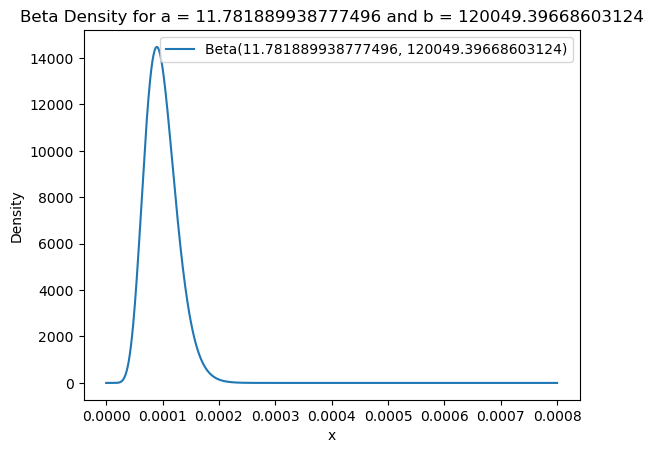

In [35]:
#Plot of this Beta density
x = np.arange(0, 8e-4, 1e-6)
y = beta.pdf(x, a, b)
plt.plot(x, y, label = f"Beta({a}, {b})")
plt.title(f'Beta Density for a = {a} and b = {b}')
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

We now compute the Bayesian estimates of kidney cancer death rates. For a county with population $POP$ and death count $DC$, our posterior density of the rate would be
\begin{align*}
  \text{Beta}(a + DC, b + POP - DC)
\end{align*}
Thus the posterior mean (which will be our Bayesian estimate of the kidney cancer death rate) is 
\begin{align*}
  \frac{a + DC}{a + b + POP}. 
\end{align*}

In [36]:
d['bayesestimate'] = (a + d['dct']) / (a + b + d['popm'])
#We can now flag the top 100 counties using the Bayesian estimate:
threshold = d['bayesestimate'].nlargest(100).iloc[-1]
d['bayeshigh'] = d['bayesestimate'] >= threshold
#Let us look at these counties to see if they are different from the previous flagged list:
with pd.option_context('display.max_rows', None):
    display(d[d['bayeshigh'] >= True])

state                           Location   fips   dc      pop  \
61           ALABAMA         Tallapoosa County, Alabama   1123    8    67871   
71           ARIZONA             Graham County, Arizona   4009    7    51342   
74           ARIZONA             Mohave County, Arizona   4015    8   149437   
79           ARIZONA            Yavapai County, Arizona   4025   14   176766   
106         ARKANSAS           Garland County, Arkansas   5051   10   154925   
148         ARKANSAS             Sharp County, Arkansas   5135    4    34922   
172       CALIFORNIA            Lake County, California   6033   12    93785   
183       CALIFORNIA            Napa County, California   6055   13   236568   
280      CONNECTICUT      Middlesex County, Connecticut   9007   20   304656   
294          FLORIDA            Broward County, Florida  12011  197  2212734   
296          FLORIDA          Charlotte County, Florida  12015   16   154371   
297          FLORIDA             Citrus County, Florida  12017   14   146051   
299          FLORIDA            Collier County, Florida  12021   22   229457   
314          FLORIDA           Hernando County, Florida  12053    8   125721   
323          FLORIDA                Lee County, Florida  12071   36   509853   
328          FLORIDA            Manatee County, Florida  12081   31   345451   
329          FLORIDA             Marion County, Florida  12083   16   280325   
330          FLORIDA             Martin County, Florida  12085   18   161947   
338          FLORIDA         Palm Beach County, Florida  12099  111  1314930   
339          FLORIDA              Pasco County, Florida  12101   58   498118   
340          FLORIDA           Pinellas County, Florida  12103  146  1612081   
346          FLORIDA           Sarasota County, Florida  12115   55   485595   
352          FLORIDA            Volusia County, Florida  12127   43   596543   
568         ILLINOIS            Bureau County, Illinois  17011    7    92928   
570         ILLINOIS           Carroll County, Illinois  17015    5    44858   
575         ILLINOIS              Clay County, Illinois  17025    8    37117   
612         ILLINOIS           LaSalle County, Illinois  17099   22   265008   
618         ILLINOIS          Macoupin County, Illinois  17117    9   116685   
630         ILLINOIS        Montgomery County, Illinois  17135   10    77006   
683          INDIANA             Dubois County, Indiana  18037    9    85189   
732          INDIANA           Randolph County, Indiana  18135   11    70673   
789             IOWA               Fayette County, Iowa  19065    6    60513   
793             IOWA                Greene County, Iowa  19073    4    28283   
819             IOWA                Marion County, Iowa  19125    8    72517   
833             IOWA                  Polk County, Iowa  19153   45   683277   
839             IOWA                Shelby County, Iowa  19165    4    36486   
844             IOWA                 Union County, Iowa  19175    7    32300   
933           KANSAS                Reno County, Kansas  20155   15   152347   
935           KANSAS                Rice County, Kansas  20159    5    27283   
951           KANSAS              Sumner County, Kansas  20191    5    60141   
1039        KENTUCKY         McCracken County, Kentucky  21145   18   130840   
1081       LOUISIANA           Acadia Parish, Louisiana  22001    8   115970   
1115       LOUISIANA     Natchitoches Parish, Louisiana  22069    7    60729   
1116       LOUISIANA          Orleans Parish, Louisiana  22071   46   561106   
1172        MARYLAND           Garrett County, Maryland  24023    5    65546   
1185   MASSACHUSETTS   Barnstable County, Massachusetts  25001   23   354916   
1230        MICHIGAN             Huron County, Michigan  26063    8    88924   
1249        MICHIGAN          Manistee County, Michigan  26101    9    54118   
1263        MICHIGAN            Ogemaw County, Michigan  26129    3    41030   
1270        MIC

Clearly now there are many counties with large populations in the list. We can plot these counties now on the US map as before.

In [37]:
#Plotting counties with high Bayesian estimates of kidney cancer rates on the US map
import plotly.express as px
#First convert fips to standard form:
d['modfips'] = d['fips'].apply(lambda x: str(x).zfill(5))
#Plotting the counties with high cancer proportion:
fig = px.choropleth(
    d, 
    geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json", # This is a dataset containing county geometries
    locations='modfips', # Use the 'fips' column for county identification
    color='bayeshigh',
    hover_name='Location',  # Display the 'Location' column on hover
    scope="usa",
    title="Top 100 kidney cancer death rate counties (in terms of Bayes estimates)",
    color_continuous_scale="YlOrRd"
)
fig.update_geos(fitbounds="locations")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

In [40]:
#Look at the states for the high counties (under both the naive and Bayes estimates)
counts = d.groupby('state').agg({'cancerhigh': 'sum', 'bayeshigh': 'sum'})
print(counts)

                      cancerhigh  bayeshigh
state                                      
ALABAMA                        1          1
ARIZONA                        0          3
ARKANSAS                       2          2
CALIFORNIA                     0          2
COLORADO                       1          0
CONNECTICUT                    0          1
DELAWARE                       0          0
DISTRICT.OF.COLUMBIA           0          0
FLORIDA                        0         14
GEORGIA                        4          0
HAWAII                         0          0
IDAHO                          2          0
ILLINOIS                       3          6
INDIANA                        0          2
IOWA                           5          6
KANSAS                         6          3
KENTUCKY                       2          1
LOUISIANA                      0          3
MAINE                          0          0
MARYLAND                       0          1
MASSACHUSETTS                  0

Clearly, there are quite many differences between the two estimates. 

Let us now see how the Bayes rule converts prior to posterior for some specific counties.

In [42]:
#Consider the county in row 1681 of the dataset:
print(d.iloc[1681])

state                                NEBRASKA
Location           McPherson County, Nebraska
fips                                    31117
dc                                          0
pop                                      1504
dc.2                                        1
pop.2                                    1392
dct                                         1
popm                                   1448.0
naiveproportion                      0.000691
cancerhigh                               True
modfips                                 31117
bayesestimate                        0.000105
bayeshigh                               False
Name: 1681, dtype: object


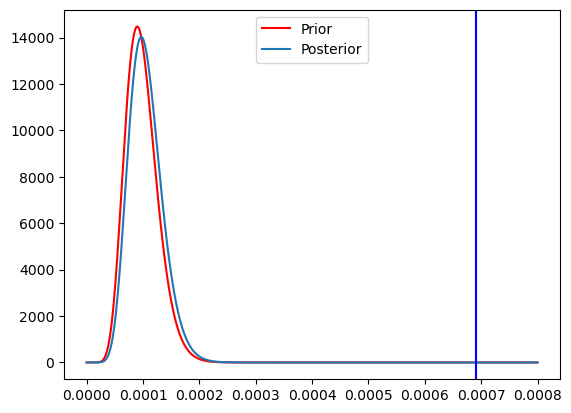

In [49]:
#This county has low population (1448) and the naiveproportion is 0.000691 (which is roughly seven times the typical value of 0.0001)
#So this has been flagged as a high risk county by the naive estimates
#Note though that this is not a high risk county according to the Bayesian estimate
x = np.arange(0, 8e-4, 1e-6)
Tot = round(d.loc[1681, 'popm'])
Pos = d.loc[1681, 'dct']
Neg = Tot - Pos
plt.plot(x, beta.pdf(x, a, b), color = 'red', label = 'Prior')
plt.plot(x, beta.pdf(x, a + Pos, b + Neg), label = 'Posterior')
plt.axvline(x = Pos/Tot, color = 'blue') #line at the naive proportion
plt.legend()
plt.show()
#Basically there is very little difference between the prior and the posterior
#In other words, the Bayesian posterior is largely ignoring the "review" data and only going by the prior
#This makes sense because there is not much information from the observed count for such a small county.

state                             NEBRASKA
Location           Arthur County, Nebraska
fips                                 31005
dc                                       0
pop                                   1295
dc.2                                     0
pop.2                                 1172
dct                                      0
popm                                1233.5
naiveproportion                        0.0
cancerhigh                           False
modfips                              31005
bayesestimate                     0.000097
bayeshigh                            False
Name: 1624, dtype: object


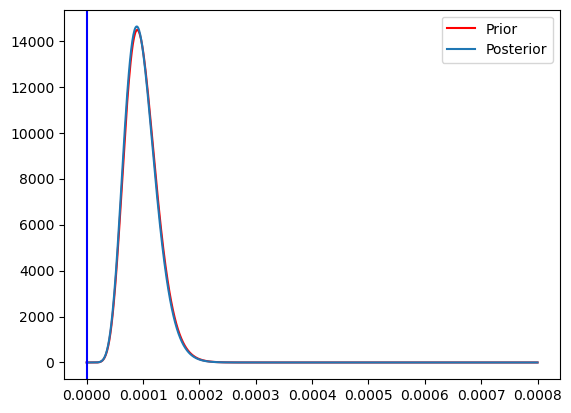

In [50]:
#Next let us look at the county in row 1624. This is Arthur County again Nebraska
#It has a small population of 1233 and death count of 0. 
print(d.iloc[1624])
x = np.arange(0, 8e-4, 1e-6)
Tot = round(d.loc[1624, 'popm'])
Pos = d.loc[1624, 'dct']
Neg = Tot - Pos
plt.plot(x, beta.pdf(x, a, b), color = 'red', label = 'Prior')
plt.plot(x, beta.pdf(x, a + Pos, b + Neg), label = 'Posterior')
plt.axvline(x = Pos/Tot, color = 'blue') #line at the naive proportion
plt.legend()
plt.show()
#Similar story here; not much difference between prior and posterior

state                               FLORIDA
Location           Sarasota County, Florida
fips                                  12115
dc                                       55
pop                                  485595
dc.2                                     65
pop.2                                573711
dct                                     120
popm                               529653.0
naiveproportion                    0.000227
cancerhigh                            False
modfips                               12115
bayesestimate                      0.000203
bayeshigh                              True
Name: 346, dtype: object


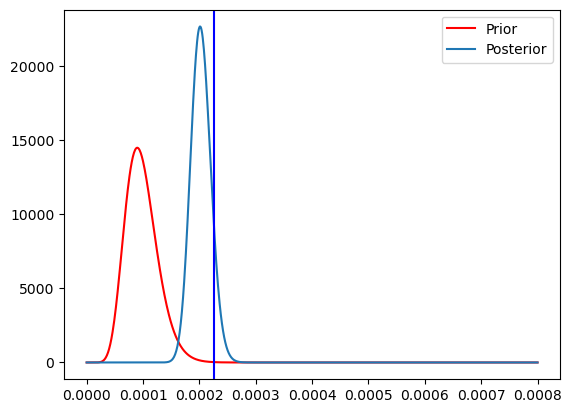

In [51]:
print(d.iloc[346])
#This is a large county (population around half a million) and a large death count (120)
x = np.arange(0, 8e-4, 1e-6)
Tot = round(d.loc[346, 'popm'])
Pos = d.loc[346, 'dct']
Neg = Tot - Pos
plt.plot(x, beta.pdf(x, a, b), color = 'red', label = 'Prior')
plt.plot(x, beta.pdf(x, a + Pos, b + Neg), label = 'Posterior')
plt.axvline(x = Pos/Tot, color = 'blue') #line at the naive proportion
plt.legend()
plt.show()
#The Bayesian posterior moves quite a bit in the direction of the frequentist estimate
#The frequentist analysis does not flag this as a high-risk county because there were many low population counties
#which dominated its proportion. 

Bayesian estimates are often said to perform "Shrinkage". They shrink the frequentist estimates towards the prior. Overall, the variability of Bayesian estimates will be quite a bit smaller compared to frequentist estimates. 

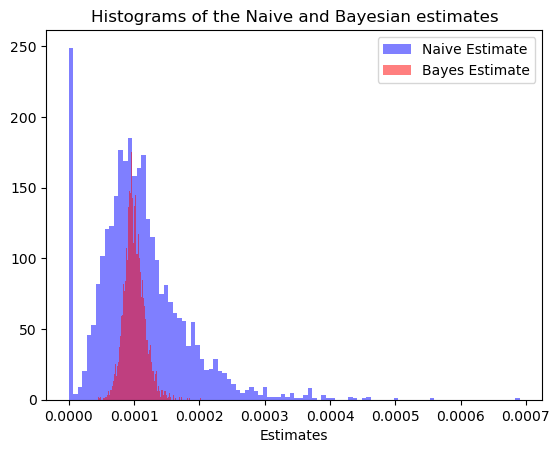

In [52]:
h1, _, _ = plt.hist(d['naiveproportion'], bins=100, color='blue', label='Naive Estimate', alpha=0.5)
h2, _, _ = plt.hist(d['bayesestimate'], bins=100, color='red', label='Bayes Estimate', alpha=0.5)

plt.title("Histograms of the Naive and Bayesian estimates")
plt.xlabel("Estimates")
plt.legend() 
plt.show()

This shrinkage is one reason why the Bayes method was able to flag Sarasota County, Florida as a high risk county even though its estimate was only 0.000203; this was already extreme compared to the rest of the Bayesian estimates.  

Recall that the original dataset had two time periods 80-84 and 85-89. We can now repeat the analysis only for the first time period and attempt to predict the proportions for the second time period. We can compare the performances of the naive proportions and the Bayes estimates in this prediction problem.

In [54]:
d['naiveproportion1'] = d['dc'] / d['pop'] #these are the naive estimates

#For the Bayes estimates, we first need to estimate the prior:
proportions1_largecounties = d['naiveproportion1'][d['pop'] >= 300000] #filter out the high population counties
m1 = np.mean(proportions1_largecounties)
V1 = np.var(proportions1_largecounties)
a1 = ((m1*m1*(1-m1))/V1) - m1
b1 = (((1-m1)*(1-m1)*m1)/V1) - (1-m1)

d['bayesestimate1'] = (d['dc'] + a1)/(d['pop'] + a1 + b1)

#Proportions from the second half of the data:
d['proportion2'] = d['dc.2'] / d['pop.2']

#Prediction Accuracy:
sum_diff_naiveproportion1 = d['naiveproportion1'] - d['proportion2']
sum_abs_diff_naiveproportion1 = sum_diff_naiveproportion1.abs().sum()

sum_diff_bayesestimate1 = d['bayesestimate1'] - d['proportion2']
sum_abs_diff_bayesestimate1 = sum_diff_bayesestimate1.abs().sum()

bothresults = [sum_abs_diff_naiveproportion1, sum_abs_diff_bayesestimate1]
print(bothresults)

[0.12508482755988196, 0.10530340006718594]


There is thus an improvement (slight) in the prediction accuracy using Bayes estimates as opposed to the naive estimates, in terms of the sum of absolute deviations (note that other comparison metrics might show different results). 